In [1]:
import numpy as np
import yaml
import networkx as nx
import matplotlib.pyplot as plt




0.17500000000000004
0.1499999999999999
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.255
0.227
0.24299999999999997
0.22999999999999998
0.21
0.22999999999999998
0.08199999999999996
0.15
0.22999999999999998
0.08249999999999996
0.15
0.21
0.17500000000000004
0.1499999999999999
0.17500000000000004
0.15500000000000003
0.17500000000000004
0.15000000000000002
0.1499999999999999
0.17500000000000004
0.15500000000000003
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.245
0.232
0.24299999999999997
0.22999999999999998
0.21
0.22999999999999998
0.08749999999999997
0.15
0.22999999999999998
0.08749999999999997
0.15
0.21
0.21
0.232
0.07549999999999998
0.15
0.232
0.07549999999999998
0.226
0.08149999999999999
0.15
0.226
0.08199999999999999
0.21
-535.0


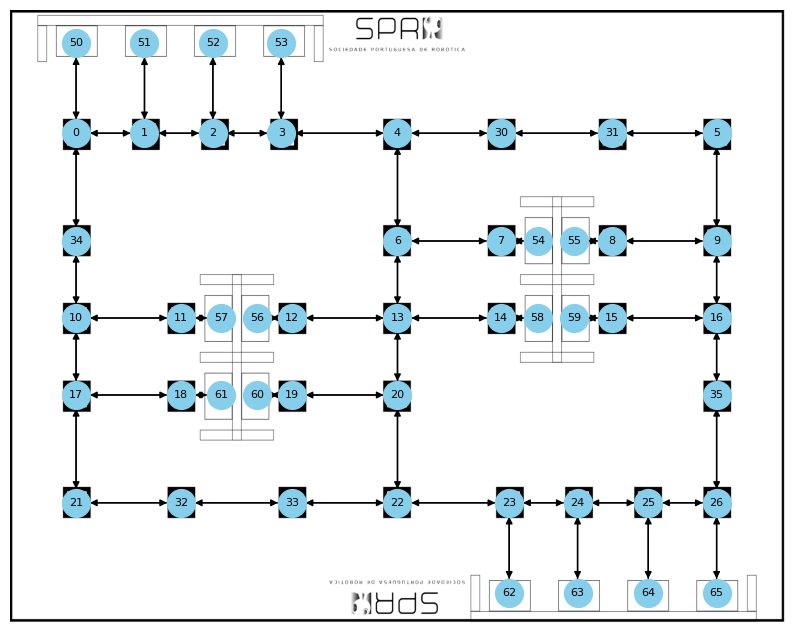

In [2]:
# Load the YAML data
with open("map.yaml", "r") as yaml_file:
    data = yaml.safe_load(yaml_file)

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node_data in data['nodes']:
    node_id = node_data['id']
    node_x = node_data['x']
    node_y = node_data['y']
    G.add_node(node_id, x=node_x, y=node_y)

# Add edges to the graph
for edge_data in data['edges']:
    source = edge_data['source']
    target = edge_data['target']
    source_x, source_y = G.nodes[source]["x"]/1000, G.nodes[source]["y"]/1000
    target_x, target_y = G.nodes[target]["x"]/1000, G.nodes[target]["y"]/1000
    distance = np.sqrt((target_x - source_x) ** 2 + (target_y - source_y) ** 2)
    print(distance)
    G.add_edge(source, target,weight=distance)
    G.add_edge(target,source,weight=distance)

image_path = "canvas.png"
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10, 8))
# Create a figure and axis

print(min(nx.get_node_attributes(G, 'y').values()))
# Set the extent of the image based on your data
# Adjust the values accordingly based on your specific case
img_extent = [-850, 850,
              -600, 600]

# Display the image as the background using imshow
ax.imshow(img, extent=img_extent, aspect='auto', zorder=-1)

# Draw the graph on top of the image
pos = {node: (G.nodes[node]["x"], G.nodes[node]["y"]) for node in G.nodes}
nx.draw(G, pos, with_labels=True, node_size=400, node_color='skyblue', font_size=8, font_color='black', ax=ax)

# Show the plot
plt.show()


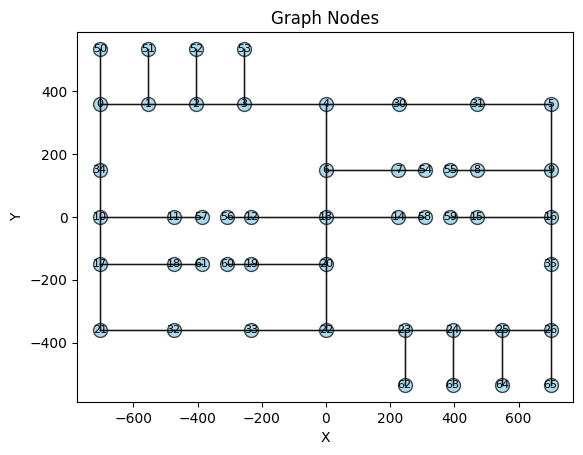

In [3]:
positions = [18,19,11,12,50,51,52,53,7,8,14,15,62,63,64,65]


pos = {node: (G.nodes[node]["x"], G.nodes[node]["y"]) for node in G.nodes}

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the nodes
node_size = 100
node_color = 'skyblue'
edge_color = 'black'
font_size = 8
font_color = 'black'
alpha = 0.7

for node, (x, y) in pos.items():
    ax.scatter(x, y, s=node_size, c=node_color, edgecolors=edge_color, alpha=alpha)
    ax.text(x, y, str(node), fontsize=font_size, color=font_color, ha='center', va='center')

for edge in G.edges():
    x1, y1 = pos[edge[0]]
    x2, y2 = pos[edge[1]]
    ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=1, alpha=alpha)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Graph Nodes')

plt.show()

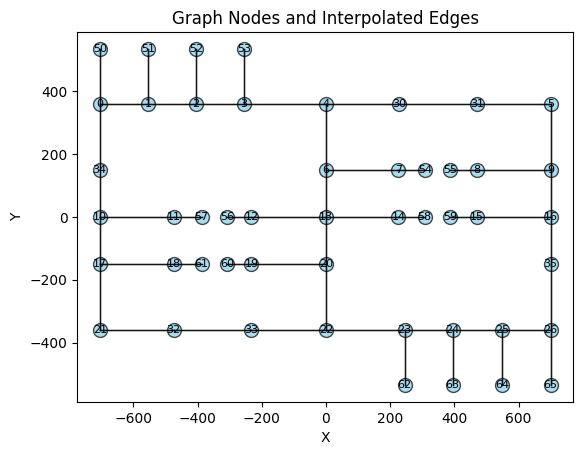

In [4]:
import scipy
from scipy.interpolate import CubicSpline

fig, ax = plt.subplots()

# Plot the nodes
node_size = 100
node_color = 'skyblue'
edge_color = 'black'
font_size = 8
font_color = 'black'
alpha = 0.7

for node, (x, y) in pos.items():
    ax.scatter(x, y, s=node_size, c=node_color, edgecolors=edge_color, alpha=alpha)
    ax.text(x, y, str(node), fontsize=font_size, color=font_color, ha='center', va='center')

# Interpolate and plot the edges using cubic splines
for edge in G.edges():
    x1, y1 = pos[edge[0]]
    x2, y2 = pos[edge[1]]
    # Define the number of interpolation points (adjust as needed)
    num_points = 100
    t = np.linspace(0, 1, num_points)
    xspline = CubicSpline([0, 1], [x1, x2],bc_type='natural')
    yspline = CubicSpline([0, 1], [y1, y2],bc_type='natural')
    x_interp = xspline(t)
    y_interp = yspline(t)
    ax.plot(x_interp, y_interp, color=edge_color, linewidth=1, alpha=alpha)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Graph Nodes and Interpolated Edges')

plt.show()



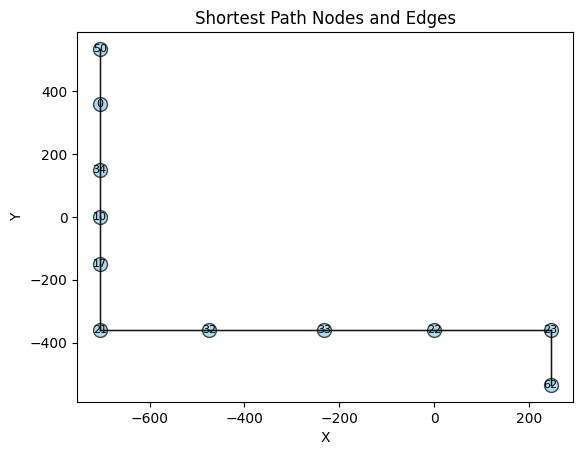

[50, 0, 34, 10, 17, 21, 32, 33, 22, 23, 62]


In [5]:
path = nx.shortest_path(G,50,62)

subgraph = G.subgraph(path)

# Get node positions from the subgraph
pos = {node: (subgraph.nodes[node]["x"], subgraph.nodes[node]["y"]) for node in subgraph.nodes}

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the nodes
node_size = 100
node_color = 'skyblue'
edge_color = 'black'
font_size = 8
font_color = 'black'
alpha = 0.7

for node, (x, y) in pos.items():
    ax.scatter(x, y, s=node_size, c=node_color, edgecolors=edge_color, alpha=alpha)
    ax.text(x, y, str(node), fontsize=font_size, color=font_color, ha='center', va='center')

# Plot the edges in the subgraph
for edge in subgraph.edges():
    x1, y1 = pos[edge[0]]
    x2, y2 = pos[edge[1]]
    ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=1, alpha=alpha)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Shortest Path Nodes and Edges')

plt.show()

print(path)

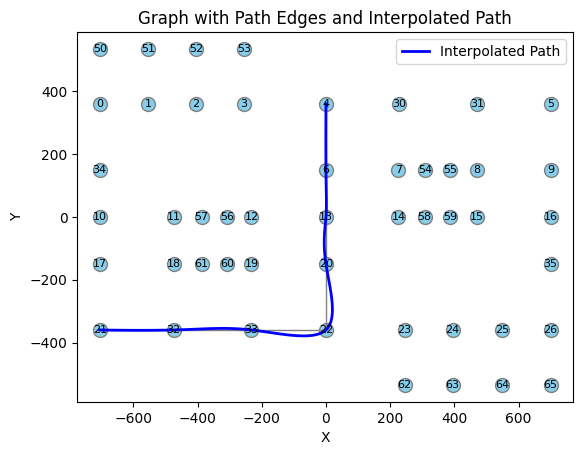

In [6]:
# Find the shortest path from node 50 to node 62


path = nx.shortest_path(G, 21, 4,weight="weight")

# Extract the coordinates of the nodes in the path
x_coords = [G.nodes[node]["x"] for node in path]
y_coords = [G.nodes[node]["y"] for node in path]

# Interpolate the path using cubic splines
t = np.linspace(0, 1, len(path))
xspline = CubicSpline(t, x_coords,bc_type="clamped")
yspline = CubicSpline(t, y_coords,bc_type="clamped")
t_interp = np.linspace(0, 1, 100)
x_interp = xspline(t_interp)
y_interp = yspline(t_interp)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot all nodes
node_size = 100
node_color = 'skyblue'
edge_color = 'gray'
font_size = 8
font_color = 'black'

for node in G.nodes:
    x, y = G.nodes[node]["x"], G.nodes[node]["y"]
    ax.scatter(x, y, s=node_size, c=node_color, edgecolors=edge_color)
    ax.text(x, y, str(node), fontsize=font_size, color=font_color, ha='center', va='center')

# Plot the edges in the path
for i in range(len(path) - 1):
    source_node = path[i]
    target_node = path[i + 1]
    x1, y1 = G.nodes[source_node]["x"], G.nodes[source_node]["y"]
    x2, y2 = G.nodes[target_node]["x"], G.nodes[target_node]["y"]
    ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=1)

# Plot the interpolated path
ax.plot(x_interp, y_interp, color='blue', linewidth=2, label='Interpolated Path')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Graph with Path Edges and Interpolated Path')
ax.legend()

plt.show()

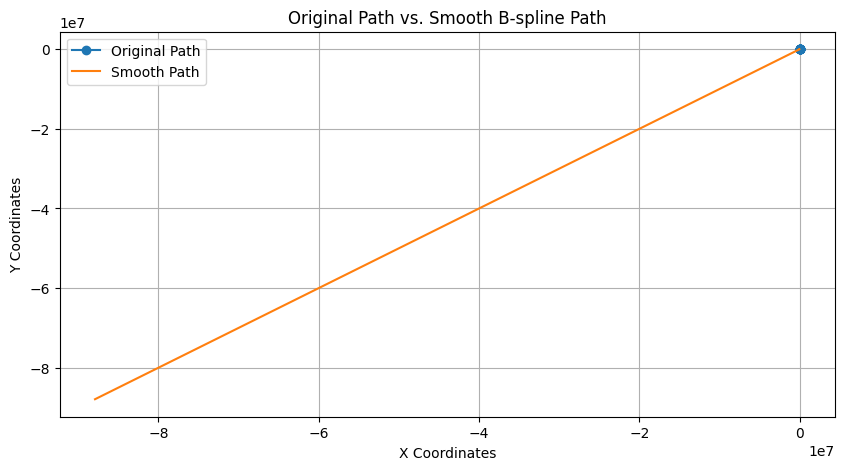

In [7]:
import yaml
from scipy.interpolate import BSpline ,splprep ,splev, splrep
import matplotlib.pyplot as plt

shortest_path = nx.shortest_path(G, source=50, target=62, weight="weight")

x_path_coords = [G.nodes[node]["x"] for node in shortest_path]
y_path_coords = [G.nodes[node]["y"] for node in shortest_path]

# Create a parameter t based on the number of waypoints
t = np.arange(len(x_path_coords))

# Fit a B-spline to the x and y coordinates
tck, _ = splprep([x_path_coords, y_path_coords], s=0)

# Evaluate the B-spline for a smoother path
smooth_path = splev(t, tck)

# Split the smooth path into x and y coordinates
smooth_x_path_coords, smooth_y_path_coords = smooth_path

# Plot the original path and the smooth path
plt.figure(figsize=(10, 5))
plt.plot(x_path_coords, y_path_coords, marker='o', label="Original Path")
plt.plot(smooth_x_path_coords, smooth_y_path_coords, label="Smooth Path")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.legend()
plt.title("Original Path vs. Smooth B-spline Path")
plt.grid()
plt.show()


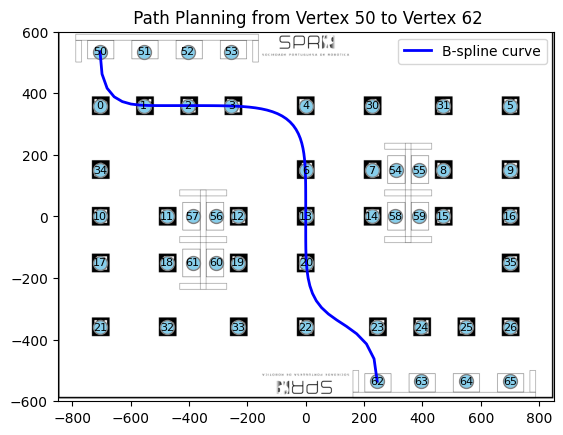

In [8]:
import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt

x=x_path_coords
y=y_path_coords

l=len(x)  
k=5
t=np.linspace(0,1,l-k+1,endpoint=True)
t=np.append(np.zeros(k),t)
t=np.append(t,np.ones(k))

tck=[t,[x,y],k]
tck_x=[t,np.array(x),k]
u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
out = interpolate.splev(u3,tck)
out_der = interpolate.splev(u3,tck,der=2)

image_path = "canvas.png"
img = plt.imread(image_path)
# Set the extent of the image based on your data
# Adjust the values accordingly based on your specific case
img_extent = [-850, 850,
              -600, 600]

# Display the image as the background using imshow

fig, ax = plt.subplots()
ax.imshow(img, extent=img_extent, aspect='auto', zorder=-1)
#plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
for node in G.nodes:
    x, y = G.nodes[node]["x"], G.nodes[node]["y"]
    ax.scatter(x, y, s=node_size, c=node_color, edgecolors=edge_color)
    ax.text(x, y, str(node), fontsize=font_size, color=font_color, ha='center', va='center')

plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
#plt.quiver(out[0], out[1], out_der[0], out_der[1], color='green', label='Derivatives',scale_units='xy') 
plt.legend(loc='best')
plt.title(' Path Planning from Vertex 50 to Vertex 62')

plt.show()


0.17500000000000004
0.1499999999999999
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.255
0.227
0.24299999999999997
0.22999999999999998
0.21
0.22999999999999998
0.08199999999999996
0.15
0.22999999999999998
0.08249999999999996
0.15
0.21
0.17500000000000004
0.1499999999999999
0.17500000000000004
0.15500000000000003
0.17500000000000004
0.15000000000000002
0.1499999999999999
0.17500000000000004
0.15500000000000003
0.17500000000000004
0.15000000000000002
0.17500000000000004
0.245
0.232
0.24299999999999997
0.22999999999999998
0.21
0.22999999999999998
0.08749999999999997
0.15
0.22999999999999998
0.08749999999999997
0.15
0.21
0.21
0.232
0.07549999999999998
0.15
0.232
0.07549999999999998
0.226
0.08149999999999999
0.15
0.226
0.08199999999999999
0.21
-535.0


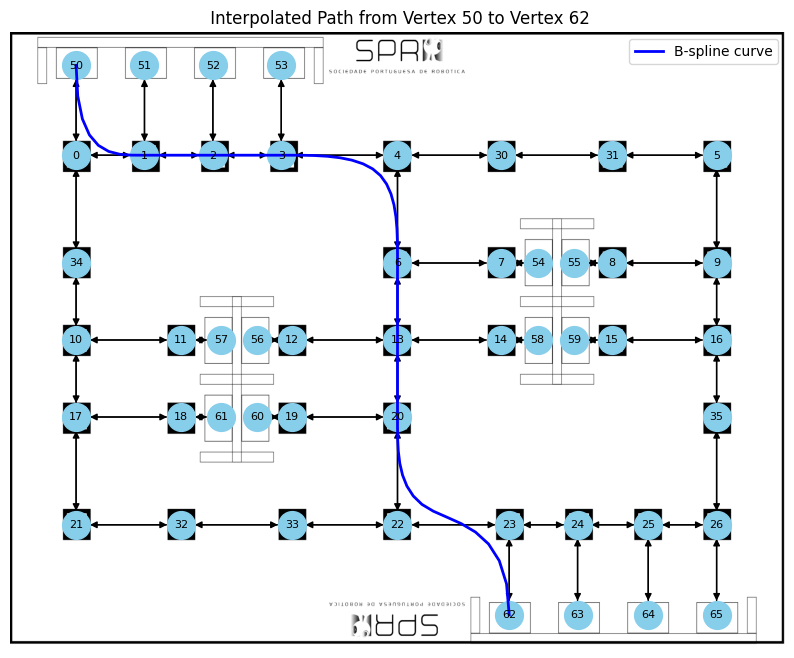

In [9]:
import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt


with open("map.yaml", "r") as yaml_file:
    data = yaml.safe_load(yaml_file)

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node_data in data['nodes']:
    node_id = node_data['id']
    node_x = node_data['x']
    node_y = node_data['y']
    G.add_node(node_id, x=node_x, y=node_y)

# Add edges to the graph
for edge_data in data['edges']:
    source = edge_data['source']
    target = edge_data['target']
    source_x, source_y = G.nodes[source]["x"]/1000, G.nodes[source]["y"]/1000
    target_x, target_y = G.nodes[target]["x"]/1000, G.nodes[target]["y"]/1000
    distance = np.sqrt((target_x - source_x) ** 2 + (target_y - source_y) ** 2)
    print(distance)
    G.add_edge(source, target,weight=distance)
    G.add_edge(target,source,weight=distance)

image_path = "canvas.png"
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10, 8))
# Create a figure and axis

print(min(nx.get_node_attributes(G, 'y').values()))
# Set the extent of the image based on your data
# Adjust the values accordingly based on your specific case
img_extent = [-850, 850,
              -600, 600]

# Display the image as the background using imshow
ax.imshow(img, extent=img_extent, aspect='auto', zorder=-1)

# Draw the graph on top of the image
pos = {node: (G.nodes[node]["x"], G.nodes[node]["y"]) for node in G.nodes}
nx.draw(G, pos, with_labels=True, node_size=400, node_color='skyblue', font_size=8, font_color='black', ax=ax)

# Show the plot
#plt.show()

###################################################################################################

x=x_path_coords
y=y_path_coords

l=len(x)  
k=3
t=np.linspace(0,1,l-k+1,endpoint=True)
t=np.append(np.zeros(k),t)
t=np.append(t,np.ones(k))

tck=[t,[x,y],k]
tck_x=[t,np.array(x),k]
u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
out = interpolate.splev(u3,tck)
out_der = interpolate.splev(u3,tck,der=2)


plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
#plt.quiver(out[0], out[1], out_der[0], out_der[1], color='green', label='Derivatives',scale_units='xy') 
plt.legend(loc='best')
plt.title(' Interpolated Path from Vertex 50 to Vertex 62')

plt.show()


In [10]:
def B(x, k, i, t):

   if k == 0:
      return 1.0 if t[i] <= x < t[i+1] else 0.0

   if t[i+k] == t[i]:
      c1 = 0.0

   else:
      c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)

   if t[i+k+1] == t[i+1]:
      c2 = 0.0

   else:
      c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)

   return c1 + c2

def B_derivative(x,k,i,t):
   
   
   #if k == 0:
    #  return 1.0 if t[i] <= x < t[i+1] else 0.0

   if t[i+k] == t[i]:
      c1 = 0.0

   else:
      c1 = (k)/(t[i+k] - t[i]) * B(x, k-1, i, t)

   if t[i+k+1] == t[i+1]:
      c2 = 0.0

   else:
      c2 = (k)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)

   return c1 - c2

def B_second_derivative(x, k, i, t):


   if t[i+k] == t[i]:
      c1 = 0.0

   else:
      c1 = (k)/(t[i+k] - t[i]) * B_derivative(x, k-1, i, t)

   if t[i+k+1] == t[i+1]:
      c2 = 0.0

   else:
      c2 = (k)/(t[i+k+1] - t[i+1]) * B_derivative(x, k-1, i+1, t)

   return c1 - c2 

   

def bspline(x, t, c, k):

   n = len(t) - k - 1

   assert (n >= k+1) and (len(c) >= n)

   return sum(c[i] * B(x, k, i, t) for i in range(n))

def bspline_derivative(x, t, c, k):

   n = len(t) - k - 1

   assert (n >= k+1) and (len(c) >= n)

   return sum(c[i]*B_derivative(x, k, i, t) for i in range(n))

def bspline_second_derivative(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B_second_derivative(x, k, i, t) for i in range(n))


7 5 9
[0.   0.   0.   0.   0.   0.   0.25 0.5  0.75 1.   1.   1.   1.  ]
13
0.026000000000000002
54 54


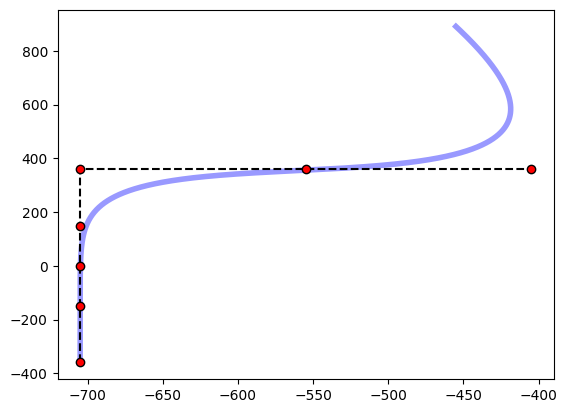

In [114]:
#splx = BSpline(tck[0], tck[1][0], k)

#sply = BSpline(tck[0], tck[1][1], k)
shortest_path = [21,17,10,34,0,1,2]
#shortest_path = [21,17,10,34,0,1,2,3,4,6,13,20,22,23,24,25,26,35,16,9,5,31,30,4,6,13,20,22,33,32,21]
x = [G.nodes[node]["x"] for node in shortest_path]
y = [G.nodes[node]["y"] for node in shortest_path]

x
y
l=len(x)  
k=5
t_max = 1
t = np.zeros(l+k+1)
step = 1/(l-k+2)
print(l,k,l+2)
for i in range(len(t)):
    if(i+1<=k):
        t[i] = 0
    elif((i+1)>=k and (i)<= l+2):
        t[i+1] = t[i] +step
    else:
        t[i]=1
print(t)


#t=np.linspace(0,1,l-k+1,endpoint=True)
#t=np.append(np.zeros(k),t)
#t=np.append(t,np.ones(k))
#print(t)
print(len(t))

tck_x=[t,x,k]
tck_y=[t,y,k]
xx = np.linspace(0, t_max, 10000, endpoint=True) #50000
yy = np.linspace(0, t_max, 10000, endpoint=True)
x_path = interpolate.splev(xx,tck_x)
x_path_der = interpolate.splev(xx,tck_x,der=1)
y_path = interpolate.splev(yy,tck_y)
y_path_der = interpolate.splev(yy,tck_y,der=1)
x_path_2nd_der = interpolate.splev(xx,tck_x,der=3)
y_path_2nd_der = interpolate.splev(yy,tck_y,der=2)
tck  = interpolate.splrep(xx,x_path,k=k)
speed = 0.65
dt = 1/25
dist = speed*dt
print(dist)

x_trajectory = []
x_trajectory.append(x_path[0])
y_trajectory = []
y_trajectory.append(y_path[0])
x_trajectory_der = []
x_trajectory_der.append(x_path_der[0])
y_trajectory_der = []
y_trajectory_der.append(y_path_der[0])

for i in range(len(x_path)-1):
    start = np.array([x_trajectory[-1],y_trajectory[-1]])/1000
    end = np.array([x_path[i],y_path[i]])/1000
    dist_between_points=np.linalg.norm(start-end,2)
    if dist_between_points > dist -dist*0.01:
        x_trajectory.append(x_path[i])
        y_trajectory.append(y_path[i])
        x_trajectory_der.append(x_path_der[i])
        y_trajectory_der.append(y_path_der[i])
    

    
print(len(x_trajectory),len(y_trajectory))
plt.plot(x_path, y_path, 'b-', lw=4, alpha=0.4, label='BSpline')
#plt.plot(x_path_der, y_path_der, 'b-', lw=4, alpha=0.4, label='BSpline_1st_derivative')
#plt.plot(x_path_2nd_der, y_path_2nd_der, 'b-', lw=4, alpha=0.4, label='BSpline_2nd_derivative')
#plt.plot(x_trajectory, y_trajectory, 'b-', lw=4, alpha=0.4, label='BSpline')
x_trajectory = np.array(x_trajectory)/1000
y_trajectory = np.array(y_trajectory)/1000
np.save('x_trajectory6.npy', x_trajectory)
np.save('y_trajectory6.npy',y_trajectory)
data = {
    'x_trajectory': x_trajectory.tolist(),
    'y_trajectory': y_trajectory.tolist()
}

with open('trajectories4.yaml', 'w') as file:
    yaml.dump(data, file)
plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')


       

plt.show()

0.008
216 216


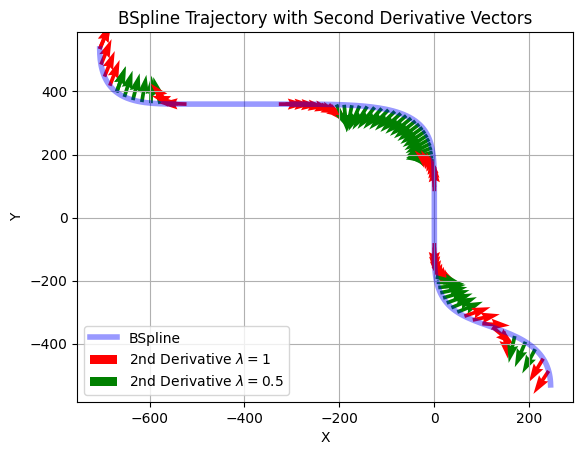

In [12]:
#splx = BSpline(tck[0], tck[1][0], k)

#sply = BSpline(tck[0], tck[1][1], k)
shortest_path = [21,17,10,34,0,1,2,3,4,6,13,20,22,23,24,25,26,35,16,9,5,31,30,4,6,13,20,22,33,32,21]
shortest_path = nx.shortest_path(G, source=50, target=62, weight="weight")
x = [G.nodes[node]["x"] for node in shortest_path]
y = [G.nodes[node]["y"] for node in shortest_path]
l=len(x)  
k=4
t=np.linspace(0,1,l-k+1,endpoint=True)
t=np.append(np.zeros(k),t)
t=np.append(t,np.ones(k))
tck=[t,[x,y],k]
xx = np.linspace(0, 1, 5000, endpoint=True) #50000
yy = np.linspace(0, 1, 5000, endpoint=True)
x_path=[bspline(x, t, tck[1][0] ,k) for x in xx]
y_path=[bspline(y, t, tck[1][1], k) for y in yy]
speed = 0.2
dt = 1/25
dist = speed*dt
print(dist)

x_trajectory = []
x_trajectory.append(x_path[0])
y_trajectory = []
y_trajectory.append(y_path[0])

for i in range(len(x_path)-1):
    start = np.array([x_trajectory[-1],y_trajectory[-1]])/1000
    end = np.array([x_path[i],y_path[i]])/1000
    dist_between_points=np.linalg.norm(start-end,2)
    if dist_between_points > dist -dist*0.01:
        x_trajectory.append(x_path[i])
        y_trajectory.append(y_path[i])
    

    
print(len(x_trajectory),len(y_trajectory))
plt.plot(x_trajectory, y_trajectory, 'b-', lw=4, alpha=0.4, label='BSpline')
np.save('x_trajectory.npy',np.array(x_trajectory)/1000)
np.save('y_trajectory.npy',np.array(y_trajectory)/1000)
#plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
flag1 = False
flag2 = False
for i,t_val in enumerate(xx):  # Select t values at t[i] % 10 == 0
    if i % 50 == 0:#
        origin_x= bspline(t_val, t, tck[1][0], k)
        origin_y= bspline(t_val, t, tck[1][1], k)
        x_2nd_derivative = bspline_second_derivative(t_val, t, tck[1][0], k)
        y_2nd_derivative = bspline_second_derivative(t_val, t, tck[1][1], k)
        x_derivative = bspline_derivative(t_val, t, tck[1][0], k)
        y_derivative = bspline_derivative(t_val, t, tck[1][1], k)
        
        grad = np.array([x_derivative,y_derivative])
        grad = grad / np.linalg.norm(grad)
        hessian = np.array([x_2nd_derivative,y_2nd_derivative])
        hessian = hessian / np.linalg.norm(hessian)
        dot_product = np.dot(hessian,grad)
        #print(dot_product)
        
        if abs(dot_product) <= .5:
            plt.quiver(origin_x, origin_y, 2*hessian[0], 2*hessian[1], color='green', scale_units='xy')
            if not flag1: 
                plt.quiver(origin_x, origin_y, 2*hessian[0], 2*hessian[1], color='green', label=r'2nd Derivative $\lambda = 0.5$', scale_units='xy')
                flag1 = True
            #plt.quiver(origin_x, origin_y, 2*grad[0], 2*grad[1], color='red', scale_units='xy')
        if abs(dot_product) >.5 and abs(dot_product) <1 :
            plt.quiver(origin_x, origin_y, 2*hessian[0], 2*hessian[1], color='red', scale_units='xy')
            if not flag2:
                plt.quiver(origin_x, origin_y, 2*hessian[0], 2*hessian[1], color='red', label=r'2nd Derivative $\lambda = 1$', scale_units='xy')
                flag2 = True
            #plt.quiver(origin_x, origin_y, 2*grad[0], 2*grad[1], color='red', scale_units='xy')


# Set plot title and labels
#plt.quiver(origin_x, origin_y, 2*hessian[0], 2*hessian[1], color='green', label="2nd Derivative", scale_units='xy')
plt.title('BSpline Trajectory with Second Derivative Vectors')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
       

plt.show()